In [1]:
  import numpy as np

  # Activation Functions
  def tanh(x):
      return np.tanh(x)

  def d_tanh(x):
      return 1 - np.square(np.tanh(x))

  def sigmoid(x):
      return 1/(1 + np.exp(-x))

  def d_sigmoid(x):
      return (1 - sigmoid(x)) * sigmoid(x)

  # Loss Functions 
  def logloss(y, a):
      return -(y*np.log(a) + (1-y)*np.log(1-a))

  def d_logloss(y, a):
      return (a - y)/(a*(1 - a))	

In [2]:
# The layer class
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

Loss :  11.376857757861378
Loss :  11.172026989755262
Loss :  10.991541100598692
Loss :  10.832627364642175
Loss :  10.692747274357098
Loss :  10.569598054219101
Loss :  10.461107290965987
Loss :  10.3654226154008
Loss :  10.280898078687365
Loss :  10.206078559447022
Loss :  10.139683245665404
Loss :  10.080588974403511
Loss :  10.027813990476513
Loss :  9.980502504236414
Loss :  9.937910286052613
Loss :  9.899391426569716
Loss :  9.864386312000901
Loss :  9.832410807198125
Loss :  9.80304660105585
Loss :  9.775932644631894
Loss :  9.750757598610246
Loss :  9.72725320049147
Loss :  9.70518846091055
Loss :  9.684364601020821
Loss :  9.664610647654836
Loss :  9.645779609039907
Loss :  9.627745160537879
Loss :  9.610398776735527
Loss :  9.593647252925656
Loss :  9.577410565396278
Loss :  9.561620025872465
Loss :  9.546216690877046
Loss :  9.531149991674374
Loss :  9.516376554844909
Loss :  9.501859187431412
Loss :  9.487566004034383
Loss :  9.473469676253647
Loss :  9.459546787514807
Loss

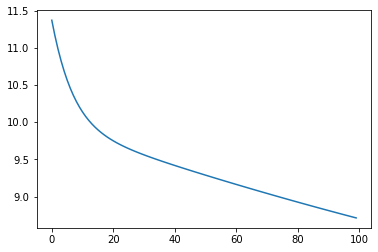

In [307]:
import pandas as pd
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

dataset = pd.read_csv("heart.csv")

y=dataset.target.to_numpy()
x=dataset.drop('target',axis=1).to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=4)


x_train = x_train.T
x_test = x_test.T
y_train = y_train
y_test = y_test

x_train.shape

m = 13
epochs = 100

layers = [Layer(13, 5, 'sigmoid'), Layer(5, 1, 'sigmoid')]
costs_train = [] # to plot graph 
costs_test = [] # to plot graph 

for epoch in range(epochs):
    A = x_test
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_test, A))
    print("Loss : " , cost )
    costs_train.append(cost)

    dA = d_logloss(y_test, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

import matplotlib.pyplot as plt
plt.plot(range(epochs), costs_train)
